## 1.Python Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2.Data loading

In [26]:
df=pd.read_csv(r".\data\covid.train.csv")
for i, j in enumerate(df.columns):
    print(i, j)

0 id
1 AL
2 AK
3 AZ
4 AR
5 CA
6 CO
7 CT
8 FL
9 GA
10 ID
11 IL
12 IN
13 IA
14 KS
15 KY
16 LA
17 MD
18 MA
19 MI
20 MN
21 MS
22 MO
23 NE
24 NV
25 NJ
26 NM
27 NY
28 NC
29 OH
30 OK
31 OR
32 PA
33 RI
34 SC
35 TX
36 UT
37 VA
38 WA
39 WV
40 WI
41 cli
42 ili
43 hh_cmnty_cli
44 nohh_cmnty_cli
45 wearing_mask
46 travel_outside_state
47 work_outside_home
48 shop
49 restaurant
50 spent_time
51 large_event
52 public_transit
53 anxious
54 depressed
55 felt_isolated
56 worried_become_ill
57 worried_finances
58 tested_positive
59 cli.1
60 ili.1
61 hh_cmnty_cli.1
62 nohh_cmnty_cli.1
63 wearing_mask.1
64 travel_outside_state.1
65 work_outside_home.1
66 shop.1
67 restaurant.1
68 spent_time.1
69 large_event.1
70 public_transit.1
71 anxious.1
72 depressed.1
73 felt_isolated.1
74 worried_become_ill.1
75 worried_finances.1
76 tested_positive.1
77 cli.2
78 ili.2
79 hh_cmnty_cli.2
80 nohh_cmnty_cli.2
81 wearing_mask.2
82 travel_outside_state.2
83 work_outside_home.2
84 shop.2
85 restaurant.2
86 spent_time.2
87 

In [22]:
no_loc = df.iloc[:, 41:59]

## 3. EDA

In [23]:
no_loc.shape

(2700, 18)

In [24]:
no_loc.columns

Index(['cli', 'ili', 'hh_cmnty_cli', 'nohh_cmnty_cli', 'wearing_mask',
       'travel_outside_state', 'work_outside_home', 'shop', 'restaurant',
       'spent_time', 'large_event', 'public_transit', 'anxious', 'depressed',
       'felt_isolated', 'worried_become_ill', 'worried_finances',
       'tested_positive'],
      dtype='object')

In [ ]:
# df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
# df.columns

In [ ]:
df.info()

### 3.1 Statistical summary

In [ ]:
df.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

### 3.2 Categorical statistical  summary

In [ ]:
df.describe().T

### 3.3 The unique value counts for each attribute

In [ ]:
df.nunique()

In [ ]:
def summary(data):
    print("******shape******")
    print(data.shape)
    print("******columns******")
    print(data.columns)
    print("******information data******")
    print(data.info())
    print("******missing values******")
    print(data.isna().sum())
    print("******Quantiles*****")
    print(data.describe([0.15,0.25,0.35,0.5,0.65,0.75,0.9]).T)
    print("*********nunique********")
    print(data.nunique())

In [ ]:
summary(df)

### 3.4 Each tag count

In [ ]:
for i in df.select_dtypes("object").columns.to_list():
    print(df[i].value_counts())
    print("*"*36)

In [ ]:
# 根据具体数据集更改
df.sort_values("tumor_size",ascending=False).head(20)
df.sort_values("tumor_size",ascending=True).head(20)

In [ ]:
# 根据具体数据集更改
df.groupby("marital_status").describe().T

In [ ]:
# 根据具体数据集更改
df.groupby("status").describe().T

### 3.5 Create lists for categorical and numeric attributes

In [ ]:
cat_list=[i for i in df.select_dtypes("object")]
num_list=[i for i in df.select_dtypes(include=["int64","float64"])]

In [ ]:
num_list

In [ ]:
cat_list

## 3.6 Categorical Analysis

In [ ]:
for i in cat_list:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i,data=df.loc[:,cat_list])

## 3.7 Numerical analysis

In [ ]:
sns.pairplot(no_loc)

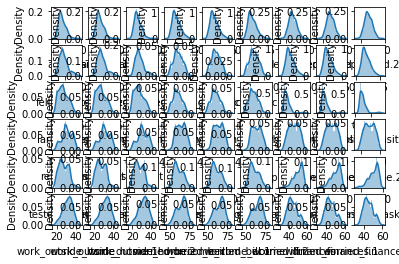

In [8]:
k=1

for i in no_loc.columns:
    plt.subplot(6,9,k)
    sns.distplot(no_loc[i])
    k+=1

plt.savefig("my_plot.png")

In [ ]:
# histogram
df.hist(figsize=(9,9))

In [ ]:
# 根据具体数据集更改
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='age',y ='reginol_node_positive',data = df)
plt.subplot(3,3,2)
sns.scatterplot(x="regional_node_examined",y="reginol_node_positive",hue="status",data=df)
plt.subplot(3,3,3)
sns.boxplot(x="age",y="status",data=df)
plt.subplot(3,3,4)
sns.boxplot(x="6th_stage",y="tumor_size",data=df)
plt.subplot(3,3,5)
sns.barplot(x="grade",y="survival_months",hue="status",data=df)
plt.subplot(3,3,6)
sns.boxplot(data=df, x="status", y="tumor_size")
plt.subplot(3,3,7)
sns.violinplot(x="n_stage",y="tumor_size",data=df,hue="status")
plt.subplot(3,3,8)
sns.boxplot(x="t_stage",y="tumor_size",data=df,hue="status")
plt.subplot(3,3,9)
sns.boxplot(x="6th_stage",y="survival_months",hue="status",data=df)
plt.show()

## 4.Data Preprocessing

### 4.1 Missing values query

In [ ]:
df.isna().sum()

### 4.2 Outlier Analysis

In [ ]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")

for i in df.loc[:,num_list]:
    plt.subplot(2,3,k)
    sns.boxplot(x = i, data = df.loc[:,num_list])
    plt.title(i)
    k+=1

In [ ]:
df.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

### 4.3 Make a copy of our dataset and remove the outliers

In [ ]:
for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.15)
    Q3 = df[i].quantile(0.85)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

In [ ]:
df_out=df.copy()

In [ ]:
for i in df_out.loc[:,num_list]:
    data_mean,data_std=df_out[i].mean(),df_out[i].std()
    cut_off=data_std*3
    lower,upper=data_mean-cut_off,data_mean+cut_off

    df_out.loc[df[i] > upper,i] = upper
    df_out.loc[df[i] < lower,i] = lower

In [ ]:
df.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

In [ ]:
df_out.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

### 4.5 The change in distribution after outliers are removed

In [ ]:
k=1

for i in df_out.loc[:,num_list]:
    plt.subplot(2,3,k)
    sns.distplot(df_out[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

In [ ]:
k=1

for i in df.loc[:,num_list]:
    plt.subplot(2,3,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

### 4.6 Encoding

In [ ]:
for i in df.select_dtypes("object"):
    print(df[i].value_counts())

In [ ]:
df.select_dtypes("object").head()

In [ ]:
for i in cat_list:
    df[i] = df[i].factorize()[0]

In [ ]:
df.head()

In [ ]:
for i in cat_list:
    df_out[i] = df_out[i].factorize()[0]

In [ ]:
df_out.head()

### 4.7 Correlation Analysis

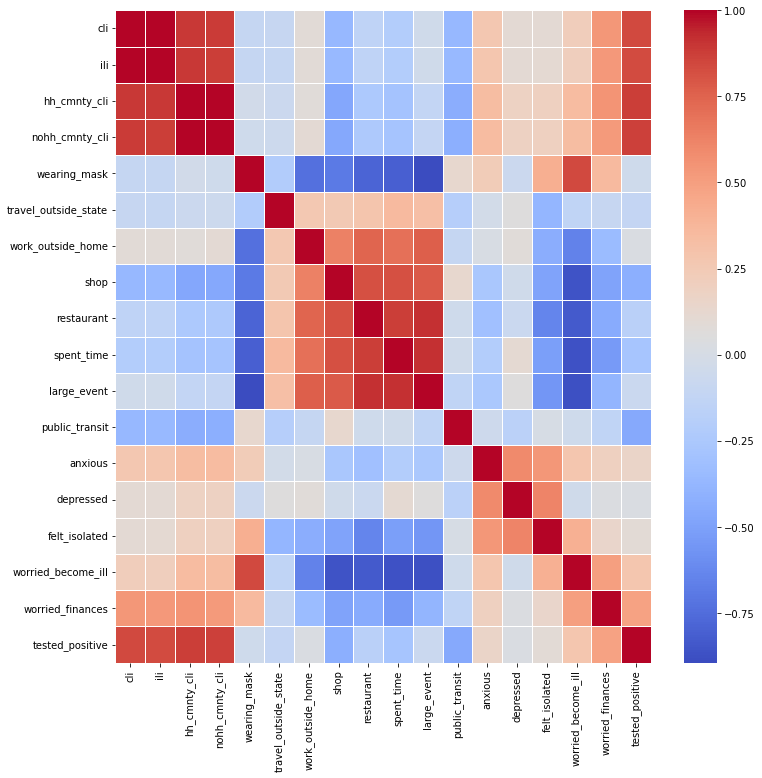

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(no_loc.corr(),linewidths=0.6,cmap="coolwarm",fmt=".2f",annot=False);

### 4.8 Extract features with high correlation relationships

In [ ]:
# 根据具体数据集更改
cor=df.corr()["status"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with status":cor.values})